<a href="https://colab.research.google.com/github/mirpouya/Machine-Learning-Intro/blob/main/Machine_Learning_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
# using sample generator to explore ML

from sklearn.datasets import make_blobs

In [31]:
# lets generate some datasets
# 100 samples in 3 classes
X, y = make_blobs(n_samples=100, centers=3)

In [32]:
# shape of X and y

print(f" X shape is : {X.shape}\n y shape is : {y.shape}")

 X shape is : (100, 2)
 y shape is : (100,)


In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [34]:
# type of X, y
type(X)

numpy.ndarray

In [35]:
X[10]

array([-7.62456277,  2.09269185])

In [36]:
y[10]

1

In [37]:
np.unique(y)

array([0, 1, 2])

In [38]:
# real dataset

iris_data = sns.load_dataset("iris")
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [39]:
iris_data.shape

(150, 5)

In [40]:
iris_data.iloc[55:60,:]

,sepal_length,sepal_width,petal_length,petal_width,species
55,5.7,2.8,4.5,1.3,versicolor
56,6.3,3.3,4.7,1.6,versicolor
57,4.9,2.4,3.3,1.0,versicolor
58,6.6,2.9,4.6,1.3,versicolor
59,5.2,2.7,3.9,1.4,versicolor


In [41]:
# working with real data

data = pd.read_csv("/content/bias_correction.csv")
data.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30/06/2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30/06/2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30/06/2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30/06/2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30/06/2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [42]:
data.shape

(7752, 25)

**<h2> Regression </h2>

In [43]:
# generate a synthetic data

X = np.arange(20)
y = 3*(X**2) + 4*X

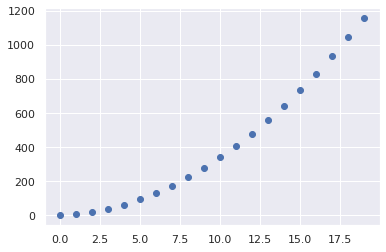

In [44]:
# visualizing y according to X
plt.scatter(X,y)

In [45]:
# import Linear Regression

from sklearn.linear_model import LinearRegression

In [46]:
model = LinearRegression()
model.fit(X[:,np.newaxis], y)   # .fit() requires data in two dimensions so we add np.newaxis to the data

LinearRegression()

In [47]:
# making predictions
y_pred = model.predict(X[:,np.newaxis])

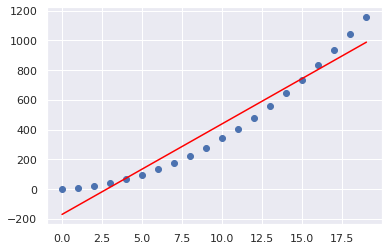

In [48]:
# comparing predictions and the actual values

plt.scatter(X,y)
plt.plot(X, y_pred, color="red")

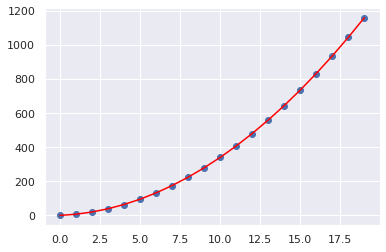

In [49]:
# let's make the model more flexible to fit to plynomial data

from sklearn.preprocessing import PolynomialFeatures

# now I want to transform my features

# defining a polynomial model with dgree of 2
poly_model = PolynomialFeatures(2)

# transformed features
X_poly = poly_model.fit_transform(X[:,np.newaxis])

# fitting the linear regression model to the new transformed polynomial features
model_p = LinearRegression()

model_p.fit(X_poly[:np.newaxis],y)

y_pred_poly = model_p.predict(X_poly)

# comparing predictions and actual values
plt.scatter(X,y)
plt.plot(X,y_pred_poly, color="red")

In [50]:
# what are the coeficients according to the model predicitons

model_p.coef_

array([0., 4., 3.])

**<h2> Classification </h2>**

In [51]:
# iris dataset
X = sns.load_dataset("iris")
X.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [52]:
# seperate target

y = X.species
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [53]:
# remove target column from X

X.drop(["species"], axis=1, inplace=True)
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [54]:
# working with SVM classifier

from sklearn.svm import SVC

In [55]:
model = SVC(gamma="auto")

model.fit(X,y)

SVC(gamma='auto')

In [56]:
# predicting classes

y_pred = model.predict(X)
y_pred

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'virginica

In [57]:
# how many of the samples is labeled correctly
print(f" y shape is : {y.shape}\n number of correct predictions : {np.count_nonzero(y_pred == y)} ")

 y shape is : (150,)
 number of correct predictions : 148 


**<h2> Clustering </h2>**

In [62]:
# Generating synthetic data

X, y = make_blobs(n_samples=500, centers=5) # to ensure centers are separated enough we have to set "cluster_std=..." to a low value

print(f" X shape is : {X.shape}\n y shape is : {y.shape}")

 X shape is : (500, 2)
 y shape is : (500,)


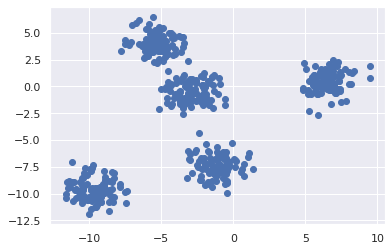

In [63]:
# visualizing data
plt.scatter(X[:,0], X[:,1])

In [64]:
# K-MEANS is a clustering algorithm

from sklearn.cluster import KMeans

In [65]:
kmeans = KMeans(n_clusters=5)   # specifying how many cluster we want to assume

kmeans.fit(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

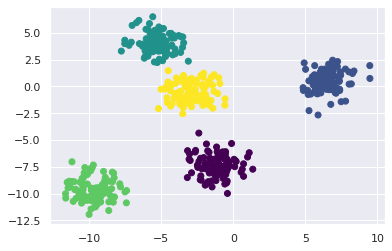

In [66]:
# predictions

y_pred = kmeans.predict(X)

# visualizing predictions with different colors
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap="viridis")   # c=ypred : category based on y_pred